In [1]:
#Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
#displaying all the columns
pd.set_option('display.max_columns', None)

#reading the file
data=pd.read_csv("fifa21_male2.csv")
data

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [3]:
#listing columns
col_list=data.columns.tolist()
print(col_list)

['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP', 'Position', 'Player Photo', 'Club Logo', 'Flag Photo', 'POT', 'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', '

In [4]:
#determine last year of contract

contracts=data["Team & Contract"]
data["contract_endyear"]=[contract[-4:] for contract in contracts]
data["contract_endyear"]

0        2016
1        2019
2        2020
3        2009
4        2021
         ... 
17120    Loan
17121    2021
17122    2022
17123    2023
17124    2024
Name: contract_endyear, Length: 17125, dtype: object

In [5]:
#see unique values

for col in data.columns:
    print(col,"| number of unique values: ",data[col].nunique())

ID | number of unique values:  17125
Name | number of unique values:  16176
Age | number of unique values:  30
OVA | number of unique values:  50
Nationality | number of unique values:  167
Club | number of unique values:  917
BOV | number of unique values:  50
BP | number of unique values:  15
Position | number of unique values:  622
Player Photo | number of unique values:  17125
Club Logo | number of unique values:  918
Flag Photo | number of unique values:  167
POT | number of unique values:  47
Team & Contract | number of unique values:  9822
Height | number of unique values:  21
Weight | number of unique values:  57
foot | number of unique values:  2
Growth | number of unique values:  28
Joined | number of unique values:  1953
Loan Date End | number of unique values:  38
Value | number of unique values:  216
Wage | number of unique values:  142
Release Clause | number of unique values:  1200
Contract | number of unique values:  434
Attacking | number of unique values:  366
Crossin

In [6]:
#dropping unnecessary columns

data=data.drop(["ID","Player Photo","Club Logo","Flag Photo","Gender"],axis=1)
data

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,contract_endyear
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,2016
1,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,2019
2,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,2020
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,2009
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,66,CB,CB,69,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,5,"Sep 29, 2020","Jun 30, 2021",€550K,€2K,€0,"Jun 30, 2021 On Loan",197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,66.0,39,11,8,8,5,7,1367,302,2 ★,2★,Medium,Medium,1 ★,54,30,37,48,64,69,5,43+2,43+2,43+2,41+0,41+0,41+0,41+0,41+0,41

In [7]:
#check out only Free and Loan contracts - viable players

data_fl = data[data["contract_endyear"].isin(["Free", "Loan"])]
data_fl

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,contract_endyear
11,D. Beckham,37,78,England,NaN,77,CM,CM RM,78,England Free,"6'0""",165lbs,Right,0,"Jan 1, 2013",NaN,€0,€0,€0,England Free,335,82,62,41,82,68.0,419,66,94.0,89,87,83,318,54,62,58.0,80,64.0,372,79,59.0,81,70,83,367,81,57.0,72.0,87.0,70,NaN,150,60,46,44.0,51,10,12,7,15,7,2012,411,3 ★,2★,Medium,Medium,3 ★,58,71,85,71,52,74,16,68+1,68+1,68+1,74+1,73+1,73+1,73+1,74+1,77+1,77+1,77+1,77+1,77+1,77+1,77+1,77+1,67+1,73+1,73+1,73+1,67+1,63+1,59+1,59+1,59+1,63+1,15+1,Free
20,G. Király,39,69,Hungary,Hungary,69,GK,NaN,69,Hungary Free,"6'4""",201lbs,Right,0,"Jul 1, 2015",NaN,€0,€0,€0,Free,94,18,20,14,25,17.0,83,18,12.0,12,28,13,227,35,31,54.0,66,41.0,209,18,77.0,34,67,13,90,27,11.0,15.0,16.0,21,NaN,41,11,14,16.0,340,71,70,60,71,68,1084,373,2 ★,1★,Medium,Medium,2 ★,71,70,60,68,33,71,3,25+0,25+0,25+0,24+0,23+0,23+0,23+0,24+0,24+0,24+0,24+0,24+0,23+0,23+0,23+0,24+0,23+0,24+0,24+0,24+0,23+0,23+0,25+0,25+0,25+0,23+0,69+0,Free
36,T. Henry,36,79,France,NaN,80,CAM,CF ST CAM LW,79,France Free,"6'2""",183lbs,Right,0,"Dec 1, 2014",NaN,€0,€0,€0,France Free,354,63,75,59,78,79.0,383,82,83.0,72,62,84,364,77,72,78.0,81,56.0,333,75,70.0,54,64,70,323,61,23.0,83.0,83.0,73,NaN,76,26,25,25.0,49,10,12,7,10,10,1882,393,4 ★,4★,Medium,Medium,3 ★,74,75,74,81,28,61,22,76+1,76+1,76+1,77+1,78+1,78+1,78+1,77+1,80+-1,80+-1,80+-1,75+1,69+1,69+1,69+1,75+1,54+1,57+1,57+1,57+1,54+1,48+1,45+1,45+1,45+1,48+1,15+1,Free
54,Ricardo Carvalho,38,79,Portugal,Portugal,77,CB,CB,79,Portugal Free,"6'0""",174lbs,Right,0,"Jan 1, 2016",NaN,€0,€0,€0,Free,303,48,48,81,74,52.0,271,51,55.0,36,65,64,261,33,46,48.0,71,63.0,269,53,70.0,32,75,39,305,84,80.0,51.0,52.0,38,79.0,233,81,80,72.0,61,16,13,8,12,12,1703,349,3 ★,2★,Medium,Medium,3 ★,40,47,60,56,80,66,4,58+2,58+2,58+2,54+1,56+1,56+1,56+1,54+1,57+2,57+2,57+2,54+2,62+2,62+2,62+2,54+2,63+2,71+2,71+2,71+2,63+2,65+2,77+2,77+2,77+2,65+2,19+2,Free
72,J. Litmanen,39,75,Finland,Finland,75,CAM,NaN,86,Finland Free,"5'11""",176lbs,Right,11,"Jan 1, 2008",NaN,€0,€0,€0,Free,374,71,77,69,85,72.0,373,72,78.0,75,67,81,285,46,50,60.0,63,66.0,272,61,43.0,50,52,66,327,20,45.0,84.0,89.0,89,NaN,49,16,13,20.0,56,13,8,13,15,7,1736,344,4 ★,3★,NaN,NaN,2 ★,48,72,79,73,27,45,3,67+0,67+0,67+0,67+0,67+0,67+0,67+0,67+0,75+0,75+0,75+0,70+0,69+0,69+0,69+0,70+0,49+0,51+0,51+0,51+0,49+0,43+0,37+0,37+0,37+0,43+0,14+0,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16938,O. Edwards,19,59,England,Grimsby Town,60,RM,LM RM,73,"Grimsby Town Jun 30, 2021 On Loan","5'8""",148lbs,Right,14,"Jul 1, 2019","Jun 30, 2021",€325K,€1K,€0,"Jun 30, 2021 On Loan",246,56,51,42,54,43.0,243,60,47.0,36,45,55,354,86,82,75.0,40,71.0,259,52,55.0,61,52,39,209,32,16.0,53.0,53.0,55,51.0,84,28,29,27.0,51,15,13,8,6,9,1446,322,2 ★,2★,High,Medium,1 ★,84,49,52,60,27,50,4,53+2,53+2,53+2,58+0,55+0,55+0,55+0,58+0,55+2,55+2,55+2,58+2,49+2,49+2,49+2,58+2,46+2,39+2,39+2,39+2,46+2,44+2,35+2,35+2,35+2,44

In [8]:
#working on ending contract years

data = data[(data["contract_endyear"] != "Free")&(data["contract_endyear"] != "Loan")]
data["contract_endyear"] = data["contract_endyear"].astype(int)
data_2020 = data[data["contract_endyear"].astype(int) >= 2020]
data_2020

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,contract_endyear
2,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,2020
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,2021
6,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,CM CDM,77,Fenerbahçe SK 2019 ~ 2020,"5'7""",159lbs,Left,0,"Jul 2, 2019",NaN,€2.8M,€44K,€5.3M,2019 ~ 2020,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4 ★,4★,Medium,Medium,2 ★,44,71,83,77,62,66,7,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,2020
12,R. Keane,35,80,Republic of Ireland,LA Galaxy,81,CF,ST,80,LA Galaxy 2011 ~ 2022,"5'9""",161lbs,Right,0,"Aug 1, 2011",NaN,€5.5M,€10K,€0,2011 ~ 2022,380,68,84,63,81,84.0,374,82,82.0,63,63,84,380,69,68,77.0,83,83.0,363,81,62.0,72,68,80,343,67,34.0,85.0,82.0,75,86.0,71,28,26,17.0,63,11,9,13,14,16,1974,407,4 ★,3★,High,Low,2 ★,68,82,75,82,31,69,10,79+1,79+1,79+1,79+0,81+-1,81+-1,81+-1,79+0,81+-1,81+-1,81+-1,78+1,74+1,74+1,74+1,78+1,57+1,57+1,57+1,57+1,57+1,52+1,47+1,47+1,47+1,52+1,20+1,2022
26,G. Buffon,42,82,Italy,Juventus,82,GK,GK,82,Juventus 2019 ~ 2021,"6'4""",203lbs,Right,0,"Jul 4, 2019",NaN,€2.2M,€41K,€3.6M,2019 ~ 2021,95,13,15,13,37,17.0,122,26,20.0,13,35,28,251,37,30,55.0,80,49.0,243,56,71.0,34,69,13,150,38,28.0,12.0,50.0,22,70.0,35,13,11,11.0,396,77,76,74,91,78,1292,429,2 ★,1★,Medium,Medium,4 ★,77,76,74,78,33,91,154,31+3,31+3,31+3,30+0,33+0,33+0,33+0,30+0,34+3,34+3,34+3,32+3,35+3,35+3,35+3,32+3,28+3,33+3,33+3,33+3,28+3,26+3,29+3,29+3,29+3,26+3,80+2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,F. Tapia,19,60,Mexico,Club América,60,GK,GK,72,Club América 2020 ~ 2022,"6'1""",174lbs,Right,12,"Jul 1, 2020",NaN,€300K,€2K,€570K,2020 ~ 2022,67,12,8,16,23,8.0,78,9,11.0,15,29,14,173,22,26,30.0,45,50.0,197,45,60.0,30,55,7,122,21,7.0,6.0,55.0,33,40.0,81,50,15,16.0,305,60,61,60,59,65,1023,329,2 ★,1★,Medium,Medium,1 ★,60,61,60,65,24,59,9,20+2,20+2,20+2,19+0,21+0,21+0,

In [9]:
#concatenate all viable players

data_final = pd.concat([data_fl, data_2020])
data_final

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,contract_endyear
11,D. Beckham,37,78,England,NaN,77,CM,CM RM,78,England Free,"6'0""",165lbs,Right,0,"Jan 1, 2013",NaN,€0,€0,€0,England Free,335,82,62,41,82,68.0,419,66,94.0,89,87,83,318,54,62,58.0,80,64.0,372,79,59.0,81,70,83,367,81,57.0,72.0,87.0,70,NaN,150,60,46,44.0,51,10,12,7,15,7,2012,411,3 ★,2★,Medium,Medium,3 ★,58,71,85,71,52,74,16,68+1,68+1,68+1,74+1,73+1,73+1,73+1,74+1,77+1,77+1,77+1,77+1,77+1,77+1,77+1,77+1,67+1,73+1,73+1,73+1,67+1,63+1,59+1,59+1,59+1,63+1,15+1,Free
20,G. Király,39,69,Hungary,Hungary,69,GK,NaN,69,Hungary Free,"6'4""",201lbs,Right,0,"Jul 1, 2015",NaN,€0,€0,€0,Free,94,18,20,14,25,17.0,83,18,12.0,12,28,13,227,35,31,54.0,66,41.0,209,18,77.0,34,67,13,90,27,11.0,15.0,16.0,21,NaN,41,11,14,16.0,340,71,70,60,71,68,1084,373,2 ★,1★,Medium,Medium,2 ★,71,70,60,68,33,71,3,25+0,25+0,25+0,24+0,23+0,23+0,23+0,24+0,24+0,24+0,24+0,24+0,23+0,23+0,23+0,24+0,23+0,24+0,24+0,24+0,23+0,23+0,25+0,25+0,25+0,23+0,69+0,Free
36,T. Henry,36,79,France,NaN,80,CAM,CF ST CAM LW,79,France Free,"6'2""",183lbs,Right,0,"Dec 1, 2014",NaN,€0,€0,€0,France Free,354,63,75,59,78,79.0,383,82,83.0,72,62,84,364,77,72,78.0,81,56.0,333,75,70.0,54,64,70,323,61,23.0,83.0,83.0,73,NaN,76,26,25,25.0,49,10,12,7,10,10,1882,393,4 ★,4★,Medium,Medium,3 ★,74,75,74,81,28,61,22,76+1,76+1,76+1,77+1,78+1,78+1,78+1,77+1,80+-1,80+-1,80+-1,75+1,69+1,69+1,69+1,75+1,54+1,57+1,57+1,57+1,54+1,48+1,45+1,45+1,45+1,48+1,15+1,Free
54,Ricardo Carvalho,38,79,Portugal,Portugal,77,CB,CB,79,Portugal Free,"6'0""",174lbs,Right,0,"Jan 1, 2016",NaN,€0,€0,€0,Free,303,48,48,81,74,52.0,271,51,55.0,36,65,64,261,33,46,48.0,71,63.0,269,53,70.0,32,75,39,305,84,80.0,51.0,52.0,38,79.0,233,81,80,72.0,61,16,13,8,12,12,1703,349,3 ★,2★,Medium,Medium,3 ★,40,47,60,56,80,66,4,58+2,58+2,58+2,54+1,56+1,56+1,56+1,54+1,57+2,57+2,57+2,54+2,62+2,62+2,62+2,54+2,63+2,71+2,71+2,71+2,63+2,65+2,77+2,77+2,77+2,65+2,19+2,Free
72,J. Litmanen,39,75,Finland,Finland,75,CAM,NaN,86,Finland Free,"5'11""",176lbs,Right,11,"Jan 1, 2008",NaN,€0,€0,€0,Free,374,71,77,69,85,72.0,373,72,78.0,75,67,81,285,46,50,60.0,63,66.0,272,61,43.0,50,52,66,327,20,45.0,84.0,89.0,89,NaN,49,16,13,20.0,56,13,8,13,15,7,1736,344,4 ★,3★,NaN,NaN,2 ★,48,72,79,73,27,45,3,67+0,67+0,67+0,67+0,67+0,67+0,67+0,67+0,75+0,75+0,75+0,70+0,69+0,69+0,69+0,70+0,49+0,51+0,51+0,51+0,49+0,43+0,37+0,37+0,37+0,43+0,14+0,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,F. Tapia,19,60,Mexico,Club América,60,GK,GK,72,Club América 2020 ~ 2022,"6'1""",174lbs,Right,12,"Jul 1, 2020",NaN,€300K,€2K,€570K,2020 ~ 2022,67,12,8,16,23,8.0,78,9,11.0,15,29,14,173,22,26,30.0,45,50.0,197,45,60.0,30,55,7,122,21,7.0,6.0,55.0,33,40.0,81,50,15,16.0,305,60,61,60,59,65,1023,329,2 ★,1★,Medium,Medium,1 ★,60,61,60,65,24,59,9,20+2,20+2,20+2,19+0,21+0,21+0,21+0,19+0,23+2,23+2,23+2,21+2,25+2,25+2,25+2,21+2,22+2,26+2,26+2,26+2,22+2,22+2,27+2,27+2,27+2,22+2,59+2,2022
17121,W. Rickard,18,56,Wa

In [10]:
#check all free players

pd.set_option('display.max_rows', 50)
data_final[data_final["contract_endyear"]=="Free"]

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,contract_endyear
11,D. Beckham,37,78,England,NaN,77,CM,CM RM,78,England Free,"6'0""",165lbs,Right,0,"Jan 1, 2013",NaN,€0,€0,€0,England Free,335,82,62,41,82,68.0,419,66,94.0,89,87,83,318,54,62,58.0,80,64.0,372,79,59.0,81,70,83,367,81,57.0,72.0,87.0,70,NaN,150,60,46,44.0,51,10,12,7,15,7,2012,411,3 ★,2★,Medium,Medium,3 ★,58,71,85,71,52,74,16,68+1,68+1,68+1,74+1,73+1,73+1,73+1,74+1,77+1,77+1,77+1,77+1,77+1,77+1,77+1,77+1,67+1,73+1,73+1,73+1,67+1,63+1,59+1,59+1,59+1,63+1,15+1,Free
20,G. Király,39,69,Hungary,Hungary,69,GK,NaN,69,Hungary Free,"6'4""",201lbs,Right,0,"Jul 1, 2015",NaN,€0,€0,€0,Free,94,18,20,14,25,17.0,83,18,12.0,12,28,13,227,35,31,54.0,66,41.0,209,18,77.0,34,67,13,90,27,11.0,15.0,16.0,21,NaN,41,11,14,16.0,340,71,70,60,71,68,1084,373,2 ★,1★,Medium,Medium,2 ★,71,70,60,68,33,71,3,25+0,25+0,25+0,24+0,23+0,23+0,23+0,24+0,24+0,24+0,24+0,24+0,23+0,23+0,23+0,24+0,23+0,24+0,24+0,24+0,23+0,23+0,25+0,25+0,25+0,23+0,69+0,Free
36,T. Henry,36,79,France,NaN,80,CAM,CF ST CAM LW,79,France Free,"6'2""",183lbs,Right,0,"Dec 1, 2014",NaN,€0,€0,€0,France Free,354,63,75,59,78,79.0,383,82,83.0,72,62,84,364,77,72,78.0,81,56.0,333,75,70.0,54,64,70,323,61,23.0,83.0,83.0,73,NaN,76,26,25,25.0,49,10,12,7,10,10,1882,393,4 ★,4★,Medium,Medium,3 ★,74,75,74,81,28,61,22,76+1,76+1,76+1,77+1,78+1,78+1,78+1,77+1,80+-1,80+-1,80+-1,75+1,69+1,69+1,69+1,75+1,54+1,57+1,57+1,57+1,54+1,48+1,45+1,45+1,45+1,48+1,15+1,Free
54,Ricardo Carvalho,38,79,Portugal,Portugal,77,CB,CB,79,Portugal Free,"6'0""",174lbs,Right,0,"Jan 1, 2016",NaN,€0,€0,€0,Free,303,48,48,81,74,52.0,271,51,55.0,36,65,64,261,33,46,48.0,71,63.0,269,53,70.0,32,75,39,305,84,80.0,51.0,52.0,38,79.0,233,81,80,72.0,61,16,13,8,12,12,1703,349,3 ★,2★,Medium,Medium,3 ★,40,47,60,56,80,66,4,58+2,58+2,58+2,54+1,56+1,56+1,56+1,54+1,57+2,57+2,57+2,54+2,62+2,62+2,62+2,54+2,63+2,71+2,71+2,71+2,63+2,65+2,77+2,77+2,77+2,65+2,19+2,Free
72,J. Litmanen,39,75,Finland,Finland,75,CAM,NaN,86,Finland Free,"5'11""",176lbs,Right,11,"Jan 1, 2008",NaN,€0,€0,€0,Free,374,71,77,69,85,72.0,373,72,78.0,75,67,81,285,46,50,60.0,63,66.0,272,61,43.0,50,52,66,327,20,45.0,84.0,89.0,89,NaN,49,16,13,20.0,56,13,8,13,15,7,1736,344,4 ★,3★,NaN,NaN,2 ★,48,72,79,73,27,45,3,67+0,67+0,67+0,67+0,67+0,67+0,67+0,67+0,75+0,75+0,75+0,70+0,69+0,69+0,69+0,70+0,49+0,51+0,51+0,51+0,49+0,43+0,37+0,37+0,37+0,43+0,14+0,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16864,T. Cseri,32,67,Hungary,Hungary,67,RW,RW LW,67,Hungary Free,"5'9""",168lbs,Right,0,"Jul 14, 2017",NaN,€0,€0,€0,Free,275,66,61,38,63,47.0,317,68,61.0,67,54,67,351,77,74,69.0,68,63.0,284,66,41.0,72,48,57,242,33,30.0,66.0,62.0,51,61.0,75,26,29,20.0,51,13,8,6,9,15,1595,344,3 ★,3★,High,Medium,1 ★,75,60,62,68,28,51,5,62+2,62+2,62+2,67+0,66+0,66+0,66+0,67+0,65+2,65+2,65+2,67+0,60+2,60+2,60+2,67+0,52+2,47+2,47+2,47+2,52+2,48+2,37+2,37+2,37+2,48+2,17+2,Free
16865,B. Babati,24,63,Hungary,Hungary,64,LM,RM ST,

In [11]:
#Test1

data_final[(data_final["POT"] > 80) & (data_final["contract_endyear"] == "Free") & (data_final["Age"] <25)]

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,contract_endyear
4195,T. Vilhena,24,78,Netherlands,Netherlands,77,CM,CM,82,Netherlands Free,"5'9""",154lbs,Left,4,"Jul 1, 2019",NaN,€0,€0,€0,Free,362,76,71,69,78,68.0,377,77,74.0,69,77,80,386,77,73,76.0,77,83.0,396,80,80.0,85,75,76,352,81,75.0,70.0,73.0,53,80.0,206,66,72,68.0,60,12,8,16,12,12,2139,451,4 ★,3★,High,High,2 ★,75,73,76,78,70,79,14,74+2,74+2,74+2,76+0,75+0,75+0,75+0,76+0,76+2,76+2,76+2,76+2,77+2,77+2,77+2,76+2,75+2,76+2,76+2,76+2,75+2,74+2,73+2,73+2,73+2,74+2,19+2,Free
7204,M. Normann,24,75,Norway,Norway,76,CDM,CDM CM,81,Norway Free,"5'10""",165lbs,Right,6,"Jan 28, 2019",NaN,€0,€0,€0,Free,306,67,57,58,75,49.0,341,74,70.0,47,74,76,366,73,71,74.0,71,77.0,376,73,78.0,83,79,63,341,75,74.0,68.0,72.0,52,72.0,206,69,71,66.0,49,14,6,9,13,7,1985,427,3 ★,3★,Medium,High,1 ★,72,61,71,75,69,79,187,68+2,68+2,68+2,70+0,70+0,70+0,70+0,70+0,72+2,72+2,72+2,72+2,73+2,73+2,73+2,72+2,72+2,74+2,74+2,74+2,72+2,71+2,71+2,71+2,71+2,71+2,17+2,Free
8894,Juiano Mestres,24,81,Brazil,Brazil,81,CB,CB CDM,81,Brazil Free,"5'11""",181lbs,Right,0,"Jan 1, 2019",NaN,€0,€0,€0,Free,309,40,56,83,67,63.0,312,60,72.0,58,58,64,344,68,74,61.0,78,63.0,381,74,91.0,76,79,61,338,86,82.0,58.0,50.0,62,70.0,246,77,85,84.0,73,18,12,14,11,18,2003,413,3 ★,2★,High,Medium,1 ★,71,61,57,62,82,80,120,67+2,67+2,67+2,61+0,64+0,64+0,64+0,61+0,62+2,62+2,62+2,62+2,65+2,65+2,65+2,62+2,71+2,74+2,74+2,74+2,71+2,74+2,81+0,81+0,81+0,74+2,22+2,Free
8950,Welington Dano,20,81,Brazil,Brazil,81,LB,LB LM,81,Brazil Free,"5'10""",152lbs,Left,0,"Jan 1, 2019",NaN,€0,€0,€0,Free,327,82,51,69,78,47.0,361,77,83.0,52,71,78,402,78,80,83.0,80,81.0,336,55,71.0,89,68,53,354,69,77.0,72.0,75.0,61,82.0,228,70,77,81.0,60,16,15,15,7,7,2068,436,4 ★,4★,Medium,Medium,1 ★,79,54,76,78,75,74,170,67+2,67+2,67+2,74+0,72+0,72+0,72+0,74+0,74+2,74+2,74+2,76+2,75+2,75+2,75+2,76+2,79+2,76+2,76+2,76+2,79+2,79+2,74+2,74+2,74+2,79+2,19+2,Free
10413,S. Szymański,21,69,Poland,Poland,70,CAM,RM CAM,83,Poland Free,"5'9""",132lbs,Left,14,"Jun 11, 2019",NaN,€0,€0,€0,Free,278,67,58,40,66,47.0,343,72,69.0,69,61,72,393,86,82,91.0,56,78.0,299,67,59.0,70,36,67,242,39,23.0,59.0,67.0,54,66.0,94,36,26,32.0,57,9,10,10,14,14,1706,360,3 ★,3★,Medium,Low,1 ★,84,61,66,73,30,46,171,61+2,61+2,61+2,69+0,67+0,67+0,67+0,69+0,68+2,68+2,68+2,68+2,61+2,61+2,61+2,68+2,54+2,48+2,48+2,48+2,54+2,50+2,38+2,38+2,38+2,50+2,17+2,Free
11140,J. Savarino,22,73,Venezuela,Venezuela,74,CAM,RW RM,82,Venezuela Free,"5'7""",146lbs,Right,9,"Feb 7, 2020",NaN,€0,€0,€0,Free,309,64,69,43,70,63.0,327,77,65.0,53,58,74,406,85,80,90.0,70,81.0,336,78,55.0,78,58,67,284,59,30.0,66.0,69.0,60,71.0,108,36,42,30.0,53,7,13,6,15,12,1823,395,4 ★,4★,High,Medium,1 ★,82,70,66,77,37,63,4,69+2,69+2,69+2,73+0,72+0,72+0,72+0,73+0,72+2,72+2,72+2,72+2,66+2,66+2,66+2,72+2,58+2,55+2,55+2,55+2,58+2,55+2,47+2,47+2,47+2,55+2,18+2,Free


In [12]:
#Test2

data_final[(data_final["POT"] > 85) & (data_final["Age"] <23)]

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,contract_endyear
9245,Brahim,20,74,Spain,Milan,75,CAM,LW RW,86,"Milan Jun 30, 2021 On Loan","5'7""",150lbs,Right,12,"Jan 6, 2019","Jun 30, 2021",€10M,€26K,€0,"Jun 30, 2021 On Loan",286,60,69,30,72,55.0,332,82,72.0,47,50,81,392,77,74,82.0,70,89.0,291,70,65.0,54,35,67,258,41,20.0,69.0,70.0,58,72.0,87,43,23,21.0,51,13,9,13,10,6,1697,360,5 ★,4★,High,Medium,1 ★,75,68,65,81,29,42,406,66+2,66+2,66+2,74+0,73+0,73+0,73+0,74+0,73+2,73+2,73+2,71+2,64+2,64+2,64+2,71+2,52+2,48+2,48+2,48+2,52+2,48+2,38+2,38+2,38+2,48+2,16+2,Loan
10003,Florentino,20,76,Portugal,AS Monaco,77,CDM,CDM CM,86,"AS Monaco Jun 30, 2021 On Loan","6'0""",161lbs,Right,10,"Jul 1, 2017","Jun 30, 2021",€11.5M,€29K,€0,"Jun 30, 2021 On Loan",253,41,35,67,74,36.0,284,64,44.0,32,72,72,341,62,67,72.0,74,66.0,314,65,59.0,76,71,43,321,79,77.0,61.0,66.0,38,76.0,230,75,78,77.0,58,6,14,14,10,14,1801,388,2 ★,3★,Medium,High,1 ★,65,44,62,68,76,73,545,60+2,60+2,60+2,61+0,63+0,63+0,63+0,61+0,65+2,65+2,65+2,64+2,69+2,69+2,69+2,64+2,70+2,75+2,75+2,75+2,70+2,71+2,74+2,74+2,74+2,71+2,18+2,Loan
10917,T. Kubo,19,75,Japan,Villarreal CF,76,CAM,RM CM CAM,89,"Villarreal CF Jun 30, 2021 On Loan","5'8""",148lbs,Left,14,"Jul 1, 2019","Jun 30, 2021",€14.5M,€16K,€0,"Jun 30, 2021 On Loan",300,61,70,39,73,57.0,364,85,68.0,72,58,81,401,89,76,87.0,65,84.0,309,66,54.0,77,52,60,273,43,29.0,68.0,72.0,61,70.0,131,40,43,48.0,48,6,7,15,10,10,1826,395,4 ★,4★,High,Medium,1 ★,82,66,68,83,39,57,1.3K,68+2,68+2,68+2,75+0,74+0,74+0,74+0,75+0,74+2,74+2,74+2,74+2,68+2,68+2,68+2,74+2,61+2,56+2,56+2,56+2,61+2,57+2,47+2,47+2,47+2,57+2,15+2,Loan
15673,Reinier,18,71,Brazil,Borussia Dortmund,73,CAM,CF CAM,87,"Borussia Dortmund Jun 30, 2022 On Loan","6'1""",159lbs,Right,16,"Jan 20, 2020","Jun 30, 2022",€4.9M,€13K,€0,"Jun 30, 2022 On Loan",322,58,68,59,67,70.0,335,77,72.0,55,57,74,379,84,80,78.0,68,69.0,326,72,54.0,69,67,64,296,60,31.0,68.0,70.0,67,74.0,129,42,47,40.0,50,13,8,13,5,11,1837,397,4 ★,4★,High,Medium,1 ★,82,68,64,75,43,65,934,70+2,70+2,70+2,71+0,71+0,71+0,71+0,71+0,71+2,71+2,71+2,71+2,65+2,65+2,65+2,71+2,58+2,56+2,56+2,56+2,58+2,56+2,52+2,52+2,52+2,56+2,16+2,Loan
7042,E. Mammana,21,77,Argentina,Zenit St. Petersburg,77,CDM,CB,88,Zenit St. Petersburg 2017 ~ 2022,"6'0""",154lbs,Right,11,"Jul 31, 2017",NaN,€13.5M,€40K,€23M,2017 ~ 2022,275,65,28,66,80,36.0,296,65,44.0,34,77,76,381,80,79,74.0,77,71.0,332,63,73.0,76,72,48,321,76,79.0,46.0,52.0,68,82.0,234,76,78,80.0,51,6,11,12,14,8,1890,409,2 ★,3★,Medium,High,1 ★,79,42,67,70,77,74,17,59+1,59+1,59+1,64+0,62+0,62+0,62+0,64+0,65+1,65+1,65+1,67+1,69+1,69+1,69+1,67+1,76+1,76+1,76+1,76+1,76+1,77+1,76+1,76+1,76+1,77+1,17+1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16302,Evanilson,20,73,Brazil,FC Porto,75,ST,ST,87,FC Porto 2020 ~ 2025,"6'4""",192lbs,Right,14,"Sep 11, 2020",NaN,€9M,€9K,€23.6M,2020 ~ 2025,327,32,79,75,72,69.0,286,72,67.0,40,36,71,329,73,71,63.0,60,62.0,341,75,6

In [13]:
#Dealing with euros

# Replace K with 000
data_final["Value"] = data_final["Value"].str.replace("K", "000")
data_final["Wage"] = data_final["Wage"].str.replace("K", "000")
data_final["Release Clause"] = data_final["Release Clause"].str.replace("K", "000")

# Replace M with 000000
data_final["Value"] = data_final["Value"].str.replace("M", "000000")
data_final["Wage"] = data_final["Wage"].str.replace("M", "000000")
data_final["Release Clause"] = data_final["Release Clause"].str.replace("M", "000000")

# Remove .
data_final["Value"] = data_final["Value"].str.replace(".", "")
data_final["Wage"] = data_final["Wage"].str.replace(".", "")
data_final["Release Clause"] = data_final["Release Clause"].str.replace(".", "")

# Remove €
data_final["Value"] = data_final["Value"].str.replace("€", "")
data_final["Wage"] = data_final["Wage"].str.replace("€", "")
data_final["Release Clause"] = data_final["Release Clause"].str.replace("€", "")

# Convert the column to numeric values
data_final["Value"] = pd.to_numeric(data_final["Value"])
data_final["Wage"] = pd.to_numeric(data_final["Wage"])
data_final["Release Clause"] = pd.to_numeric(data_final["Release Clause"])


data_final

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,contract_endyear
11,D. Beckham,37,78,England,NaN,77,CM,CM RM,78,England Free,"6'0""",165lbs,Right,0,"Jan 1, 2013",NaN,0,0,0,England Free,335,82,62,41,82,68.0,419,66,94.0,89,87,83,318,54,62,58.0,80,64.0,372,79,59.0,81,70,83,367,81,57.0,72.0,87.0,70,NaN,150,60,46,44.0,51,10,12,7,15,7,2012,411,3 ★,2★,Medium,Medium,3 ★,58,71,85,71,52,74,16,68+1,68+1,68+1,74+1,73+1,73+1,73+1,74+1,77+1,77+1,77+1,77+1,77+1,77+1,77+1,77+1,67+1,73+1,73+1,73+1,67+1,63+1,59+1,59+1,59+1,63+1,15+1,Free
20,G. Király,39,69,Hungary,Hungary,69,GK,NaN,69,Hungary Free,"6'4""",201lbs,Right,0,"Jul 1, 2015",NaN,0,0,0,Free,94,18,20,14,25,17.0,83,18,12.0,12,28,13,227,35,31,54.0,66,41.0,209,18,77.0,34,67,13,90,27,11.0,15.0,16.0,21,NaN,41,11,14,16.0,340,71,70,60,71,68,1084,373,2 ★,1★,Medium,Medium,2 ★,71,70,60,68,33,71,3,25+0,25+0,25+0,24+0,23+0,23+0,23+0,24+0,24+0,24+0,24+0,24+0,23+0,23+0,23+0,24+0,23+0,24+0,24+0,24+0,23+0,23+0,25+0,25+0,25+0,23+0,69+0,Free
36,T. Henry,36,79,France,NaN,80,CAM,CF ST CAM LW,79,France Free,"6'2""",183lbs,Right,0,"Dec 1, 2014",NaN,0,0,0,France Free,354,63,75,59,78,79.0,383,82,83.0,72,62,84,364,77,72,78.0,81,56.0,333,75,70.0,54,64,70,323,61,23.0,83.0,83.0,73,NaN,76,26,25,25.0,49,10,12,7,10,10,1882,393,4 ★,4★,Medium,Medium,3 ★,74,75,74,81,28,61,22,76+1,76+1,76+1,77+1,78+1,78+1,78+1,77+1,80+-1,80+-1,80+-1,75+1,69+1,69+1,69+1,75+1,54+1,57+1,57+1,57+1,54+1,48+1,45+1,45+1,45+1,48+1,15+1,Free
54,Ricardo Carvalho,38,79,Portugal,Portugal,77,CB,CB,79,Portugal Free,"6'0""",174lbs,Right,0,"Jan 1, 2016",NaN,0,0,0,Free,303,48,48,81,74,52.0,271,51,55.0,36,65,64,261,33,46,48.0,71,63.0,269,53,70.0,32,75,39,305,84,80.0,51.0,52.0,38,79.0,233,81,80,72.0,61,16,13,8,12,12,1703,349,3 ★,2★,Medium,Medium,3 ★,40,47,60,56,80,66,4,58+2,58+2,58+2,54+1,56+1,56+1,56+1,54+1,57+2,57+2,57+2,54+2,62+2,62+2,62+2,54+2,63+2,71+2,71+2,71+2,63+2,65+2,77+2,77+2,77+2,65+2,19+2,Free
72,J. Litmanen,39,75,Finland,Finland,75,CAM,NaN,86,Finland Free,"5'11""",176lbs,Right,11,"Jan 1, 2008",NaN,0,0,0,Free,374,71,77,69,85,72.0,373,72,78.0,75,67,81,285,46,50,60.0,63,66.0,272,61,43.0,50,52,66,327,20,45.0,84.0,89.0,89,NaN,49,16,13,20.0,56,13,8,13,15,7,1736,344,4 ★,3★,NaN,NaN,2 ★,48,72,79,73,27,45,3,67+0,67+0,67+0,67+0,67+0,67+0,67+0,67+0,75+0,75+0,75+0,70+0,69+0,69+0,69+0,70+0,49+0,51+0,51+0,51+0,49+0,43+0,37+0,37+0,37+0,43+0,14+0,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,F. Tapia,19,60,Mexico,Club América,60,GK,GK,72,Club América 2020 ~ 2022,"6'1""",174lbs,Right,12,"Jul 1, 2020",NaN,300000,2000,570000,2020 ~ 2022,67,12,8,16,23,8.0,78,9,11.0,15,29,14,173,22,26,30.0,45,50.0,197,45,60.0,30,55,7,122,21,7.0,6.0,55.0,33,40.0,81,50,15,16.0,305,60,61,60,59,65,1023,329,2 ★,1★,Medium,Medium,1 ★,60,61,60,65,24,59,9,20+2,20+2,20+2,19+0,21+0,21+0,21+0,19+0,23+2,23+2,23+2,21+2,25+2,25+2,25+2,21+2,22+2,26+2,26+2,26+2,22+2,22+2,27+2,27+2,27+2,22+2,59+2,2022
17121,W. Rickard,18,56,Wales,Burnley,

In [14]:
columns_to_apply = ["W/F", 'SM', 'IR']+list(data_final.loc[:, "LS":"GK"].columns)

# loop through the columns and apply the functions
for col in columns_to_apply:
    # extract the numeric values from the column and assign to a new column
    data_final[col] = data_final[col].str.extract('(\d+)', expand=False).astype(int)
    
    # check if the column has a '+' sign and sum the values if true
    if '+' in data_final[col]:
        data_final[col] = data_final[col].str.split('+').apply(lambda x: sum(map(int, x)))

# display the updated DataFrame
data_final

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,contract_endyear
11,D. Beckham,37,78,England,NaN,77,CM,CM RM,78,England Free,"6'0""",165lbs,Right,0,"Jan 1, 2013",NaN,0,0,0,England Free,335,82,62,41,82,68.0,419,66,94.0,89,87,83,318,54,62,58.0,80,64.0,372,79,59.0,81,70,83,367,81,57.0,72.0,87.0,70,NaN,150,60,46,44.0,51,10,12,7,15,7,2012,411,3,2,Medium,Medium,3,58,71,85,71,52,74,16,68,68,68,74,73,73,73,74,77,77,77,77,77,77,77,77,67,73,73,73,67,63,59,59,59,63,15,Free
20,G. Király,39,69,Hungary,Hungary,69,GK,NaN,69,Hungary Free,"6'4""",201lbs,Right,0,"Jul 1, 2015",NaN,0,0,0,Free,94,18,20,14,25,17.0,83,18,12.0,12,28,13,227,35,31,54.0,66,41.0,209,18,77.0,34,67,13,90,27,11.0,15.0,16.0,21,NaN,41,11,14,16.0,340,71,70,60,71,68,1084,373,2,1,Medium,Medium,2,71,70,60,68,33,71,3,25,25,25,24,23,23,23,24,24,24,24,24,23,23,23,24,23,24,24,24,23,23,25,25,25,23,69,Free
36,T. Henry,36,79,France,NaN,80,CAM,CF ST CAM LW,79,France Free,"6'2""",183lbs,Right,0,"Dec 1, 2014",NaN,0,0,0,France Free,354,63,75,59,78,79.0,383,82,83.0,72,62,84,364,77,72,78.0,81,56.0,333,75,70.0,54,64,70,323,61,23.0,83.0,83.0,73,NaN,76,26,25,25.0,49,10,12,7,10,10,1882,393,4,4,Medium,Medium,3,74,75,74,81,28,61,22,76,76,76,77,78,78,78,77,80,80,80,75,69,69,69,75,54,57,57,57,54,48,45,45,45,48,15,Free
54,Ricardo Carvalho,38,79,Portugal,Portugal,77,CB,CB,79,Portugal Free,"6'0""",174lbs,Right,0,"Jan 1, 2016",NaN,0,0,0,Free,303,48,48,81,74,52.0,271,51,55.0,36,65,64,261,33,46,48.0,71,63.0,269,53,70.0,32,75,39,305,84,80.0,51.0,52.0,38,79.0,233,81,80,72.0,61,16,13,8,12,12,1703,349,3,2,Medium,Medium,3,40,47,60,56,80,66,4,58,58,58,54,56,56,56,54,57,57,57,54,62,62,62,54,63,71,71,71,63,65,77,77,77,65,19,Free
72,J. Litmanen,39,75,Finland,Finland,75,CAM,NaN,86,Finland Free,"5'11""",176lbs,Right,11,"Jan 1, 2008",NaN,0,0,0,Free,374,71,77,69,85,72.0,373,72,78.0,75,67,81,285,46,50,60.0,63,66.0,272,61,43.0,50,52,66,327,20,45.0,84.0,89.0,89,NaN,49,16,13,20.0,56,13,8,13,15,7,1736,344,4,3,NaN,NaN,2,48,72,79,73,27,45,3,67,67,67,67,67,67,67,67,75,75,75,70,69,69,69,70,49,51,51,51,49,43,37,37,37,43,14,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,F. Tapia,19,60,Mexico,Club América,60,GK,GK,72,Club América 2020 ~ 2022,"6'1""",174lbs,Right,12,"Jul 1, 2020",NaN,300000,2000,570000,2020 ~ 2022,67,12,8,16,23,8.0,78,9,11.0,15,29,14,173,22,26,30.0,45,50.0,197,45,60.0,30,55,7,122,21,7.0,6.0,55.0,33,40.0,81,50,15,16.0,305,60,61,60,59,65,1023,329,2,1,Medium,Medium,1,60,61,60,65,24,59,9,20,20,20,19,21,21,21,19,23,23,23,21,25,25,25,21,22,26,26,26,22,22,27,27,27,22,59,2022
17121,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,66,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,10,"Aug 20, 2020",NaN,130000,3000,273000,2020 ~ 2021,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,3,2,Medium,Medium,1,62,46,57,56,43,55,5,53,53,53,55,54,54,54,55,56,56,56,56,55,55,55,56,

In [15]:
#find columns with floats like decimals, eg 50.0, 62.0 and so on
cols_to_convert = []
for col in data_final.columns:
    if data_final[col].dtype == 'float64' and data_final[col].apply(lambda x: x.is_integer()).any():
        cols_to_convert.append(col)
        
for col in cols_to_convert:
    data_final[col] = data_final[col].replace([np.nan, np.inf, -np.inf], [0, np.iinfo(np.int32).max, np.iinfo(np.int32).min])
    data_final[col] = pd.to_numeric(data_final[col], downcast='integer', errors='coerce')

data_final

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,contract_endyear
11,D. Beckham,37,78,England,NaN,77,CM,CM RM,78,England Free,"6'0""",165lbs,Right,0,"Jan 1, 2013",NaN,0,0,0,England Free,335,82,62,41,82,68,419,66,94,89,87,83,318,54,62,58,80,64,372,79,59,81,70,83,367,81,57,72,87,70,0,150,60,46,44,51,10,12,7,15,7,2012,411,3,2,Medium,Medium,3,58,71,85,71,52,74,16,68,68,68,74,73,73,73,74,77,77,77,77,77,77,77,77,67,73,73,73,67,63,59,59,59,63,15,Free
20,G. Király,39,69,Hungary,Hungary,69,GK,NaN,69,Hungary Free,"6'4""",201lbs,Right,0,"Jul 1, 2015",NaN,0,0,0,Free,94,18,20,14,25,17,83,18,12,12,28,13,227,35,31,54,66,41,209,18,77,34,67,13,90,27,11,15,16,21,0,41,11,14,16,340,71,70,60,71,68,1084,373,2,1,Medium,Medium,2,71,70,60,68,33,71,3,25,25,25,24,23,23,23,24,24,24,24,24,23,23,23,24,23,24,24,24,23,23,25,25,25,23,69,Free
36,T. Henry,36,79,France,NaN,80,CAM,CF ST CAM LW,79,France Free,"6'2""",183lbs,Right,0,"Dec 1, 2014",NaN,0,0,0,France Free,354,63,75,59,78,79,383,82,83,72,62,84,364,77,72,78,81,56,333,75,70,54,64,70,323,61,23,83,83,73,0,76,26,25,25,49,10,12,7,10,10,1882,393,4,4,Medium,Medium,3,74,75,74,81,28,61,22,76,76,76,77,78,78,78,77,80,80,80,75,69,69,69,75,54,57,57,57,54,48,45,45,45,48,15,Free
54,Ricardo Carvalho,38,79,Portugal,Portugal,77,CB,CB,79,Portugal Free,"6'0""",174lbs,Right,0,"Jan 1, 2016",NaN,0,0,0,Free,303,48,48,81,74,52,271,51,55,36,65,64,261,33,46,48,71,63,269,53,70,32,75,39,305,84,80,51,52,38,79,233,81,80,72,61,16,13,8,12,12,1703,349,3,2,Medium,Medium,3,40,47,60,56,80,66,4,58,58,58,54,56,56,56,54,57,57,57,54,62,62,62,54,63,71,71,71,63,65,77,77,77,65,19,Free
72,J. Litmanen,39,75,Finland,Finland,75,CAM,NaN,86,Finland Free,"5'11""",176lbs,Right,11,"Jan 1, 2008",NaN,0,0,0,Free,374,71,77,69,85,72,373,72,78,75,67,81,285,46,50,60,63,66,272,61,43,50,52,66,327,20,45,84,89,89,0,49,16,13,20,56,13,8,13,15,7,1736,344,4,3,NaN,NaN,2,48,72,79,73,27,45,3,67,67,67,67,67,67,67,67,75,75,75,70,69,69,69,70,49,51,51,51,49,43,37,37,37,43,14,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,F. Tapia,19,60,Mexico,Club América,60,GK,GK,72,Club América 2020 ~ 2022,"6'1""",174lbs,Right,12,"Jul 1, 2020",NaN,300000,2000,570000,2020 ~ 2022,67,12,8,16,23,8,78,9,11,15,29,14,173,22,26,30,45,50,197,45,60,30,55,7,122,21,7,6,55,33,40,81,50,15,16,305,60,61,60,59,65,1023,329,2,1,Medium,Medium,1,60,61,60,65,24,59,9,20,20,20,19,21,21,21,19,23,23,23,21,25,25,25,21,22,26,26,26,22,22,27,27,27,22,59,2022
17121,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,66,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,10,"Aug 20, 2020",NaN,130000,3000,273000,2020 ~ 2021,248,50,43,50,64,41,264,57,42,50,61,54,298,61,63,52,54,68,271,51,62,53,57,48,259,51,50,55,53,50,46,132,34,42,56,57,12,15,7,12,11,1529,319,3,2,Medium,Medium,1,62,46,57,56,43,55,5,53,53,53,55,54,54,54,55,56,56,56,56,55,55,55,56,53,52,52,52,53,52,49,49,49,52,17,2021
17122,C. Barrett,18,56,England,Burnley,56,RB,RB,67,Burnley 2020 ~ 2022,"5'9""",154lbs,Right,11,"Aug 20

In [16]:
#convert height and weight
def convert_height(height):
    # extract the feet value from the string
    feet = int(height.split("'")[0])
    # extract the inches value from the string
    inches = int(height.split("'")[1].replace('"', ''))
    # convert feet and inches to total inches
    total_inches = feet * 12 + inches
    return total_inches

def convert_weight(weight):
    # extract the pounds value from the string
    pounds = int(weight.split('lbs')[0])
    return pounds

# apply the conversion functions to the columns "Height" and "Weight"
data_final['Height'] = data_final['Height'].apply(convert_height)
data_final['Weight']= data_final['Weight'].apply(convert_weight)

data_final

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,contract_endyear
11,D. Beckham,37,78,England,NaN,77,CM,CM RM,78,England Free,72,165,Right,0,"Jan 1, 2013",NaN,0,0,0,England Free,335,82,62,41,82,68,419,66,94,89,87,83,318,54,62,58,80,64,372,79,59,81,70,83,367,81,57,72,87,70,0,150,60,46,44,51,10,12,7,15,7,2012,411,3,2,Medium,Medium,3,58,71,85,71,52,74,16,68,68,68,74,73,73,73,74,77,77,77,77,77,77,77,77,67,73,73,73,67,63,59,59,59,63,15,Free
20,G. Király,39,69,Hungary,Hungary,69,GK,NaN,69,Hungary Free,76,201,Right,0,"Jul 1, 2015",NaN,0,0,0,Free,94,18,20,14,25,17,83,18,12,12,28,13,227,35,31,54,66,41,209,18,77,34,67,13,90,27,11,15,16,21,0,41,11,14,16,340,71,70,60,71,68,1084,373,2,1,Medium,Medium,2,71,70,60,68,33,71,3,25,25,25,24,23,23,23,24,24,24,24,24,23,23,23,24,23,24,24,24,23,23,25,25,25,23,69,Free
36,T. Henry,36,79,France,NaN,80,CAM,CF ST CAM LW,79,France Free,74,183,Right,0,"Dec 1, 2014",NaN,0,0,0,France Free,354,63,75,59,78,79,383,82,83,72,62,84,364,77,72,78,81,56,333,75,70,54,64,70,323,61,23,83,83,73,0,76,26,25,25,49,10,12,7,10,10,1882,393,4,4,Medium,Medium,3,74,75,74,81,28,61,22,76,76,76,77,78,78,78,77,80,80,80,75,69,69,69,75,54,57,57,57,54,48,45,45,45,48,15,Free
54,Ricardo Carvalho,38,79,Portugal,Portugal,77,CB,CB,79,Portugal Free,72,174,Right,0,"Jan 1, 2016",NaN,0,0,0,Free,303,48,48,81,74,52,271,51,55,36,65,64,261,33,46,48,71,63,269,53,70,32,75,39,305,84,80,51,52,38,79,233,81,80,72,61,16,13,8,12,12,1703,349,3,2,Medium,Medium,3,40,47,60,56,80,66,4,58,58,58,54,56,56,56,54,57,57,57,54,62,62,62,54,63,71,71,71,63,65,77,77,77,65,19,Free
72,J. Litmanen,39,75,Finland,Finland,75,CAM,NaN,86,Finland Free,71,176,Right,11,"Jan 1, 2008",NaN,0,0,0,Free,374,71,77,69,85,72,373,72,78,75,67,81,285,46,50,60,63,66,272,61,43,50,52,66,327,20,45,84,89,89,0,49,16,13,20,56,13,8,13,15,7,1736,344,4,3,NaN,NaN,2,48,72,79,73,27,45,3,67,67,67,67,67,67,67,67,75,75,75,70,69,69,69,70,49,51,51,51,49,43,37,37,37,43,14,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,F. Tapia,19,60,Mexico,Club América,60,GK,GK,72,Club América 2020 ~ 2022,73,174,Right,12,"Jul 1, 2020",NaN,300000,2000,570000,2020 ~ 2022,67,12,8,16,23,8,78,9,11,15,29,14,173,22,26,30,45,50,197,45,60,30,55,7,122,21,7,6,55,33,40,81,50,15,16,305,60,61,60,59,65,1023,329,2,1,Medium,Medium,1,60,61,60,65,24,59,9,20,20,20,19,21,21,21,19,23,23,23,21,25,25,25,21,22,26,26,26,22,22,27,27,27,22,59,2022
17121,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,66,Burnley 2020 ~ 2021,70,170,Right,10,"Aug 20, 2020",NaN,130000,3000,273000,2020 ~ 2021,248,50,43,50,64,41,264,57,42,50,61,54,298,61,63,52,54,68,271,51,62,53,57,48,259,51,50,55,53,50,46,132,34,42,56,57,12,15,7,12,11,1529,319,3,2,Medium,Medium,1,62,46,57,56,43,55,5,53,53,53,55,54,54,54,55,56,56,56,56,55,55,55,56,53,52,52,52,53,52,49,49,49,52,17,2021
17122,C. Barrett,18,56,England,Burnley,56,RB,RB,67,Burnley 2020 ~ 2022,69,154,Right,11,"Aug 20, 2020",NaN,130000,2000,273000,2020 ~ 2022,218,55,34,53,42,34,212,

In [17]:
# convert to datetime and extract day year month
data_final['Joined'] = pd.to_datetime(data_final['Joined'])
data_final['Joined_Year'] = data_final['Joined'].dt.year
data_final['Joined_Month'] = data_final['Joined'].dt.month
data_final['Joined_Day'] = data_final['Joined'].dt.day

# drop original column
data_final.drop('Joined', axis=1, inplace=True)

cols_to_convert = ["Joined_Year",'Joined_Month','Joined_Day']
for col in data_final.columns:
    if data_final[col].dtype == 'float64' and data_final[col].apply(lambda x: x.is_integer()).any():
        cols_to_convert.append(col)
        
for col in cols_to_convert:
    data_final[col] = data_final[col].replace([np.nan, np.inf, -np.inf], [0, np.iinfo(np.int32).max, np.iinfo(np.int32).min])
    data_final[col] = pd.to_numeric(data_final[col], downcast='integer', errors='coerce')

data_final

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,contract_endyear,Joined_Year,Joined_Month,Joined_Day
11,D. Beckham,37,78,England,NaN,77,CM,CM RM,78,England Free,72,165,Right,0,NaN,0,0,0,England Free,335,82,62,41,82,68,419,66,94,89,87,83,318,54,62,58,80,64,372,79,59,81,70,83,367,81,57,72,87,70,0,150,60,46,44,51,10,12,7,15,7,2012,411,3,2,Medium,Medium,3,58,71,85,71,52,74,16,68,68,68,74,73,73,73,74,77,77,77,77,77,77,77,77,67,73,73,73,67,63,59,59,59,63,15,Free,2013,1,1
20,G. Király,39,69,Hungary,Hungary,69,GK,NaN,69,Hungary Free,76,201,Right,0,NaN,0,0,0,Free,94,18,20,14,25,17,83,18,12,12,28,13,227,35,31,54,66,41,209,18,77,34,67,13,90,27,11,15,16,21,0,41,11,14,16,340,71,70,60,71,68,1084,373,2,1,Medium,Medium,2,71,70,60,68,33,71,3,25,25,25,24,23,23,23,24,24,24,24,24,23,23,23,24,23,24,24,24,23,23,25,25,25,23,69,Free,2015,7,1
36,T. Henry,36,79,France,NaN,80,CAM,CF ST CAM LW,79,France Free,74,183,Right,0,NaN,0,0,0,France Free,354,63,75,59,78,79,383,82,83,72,62,84,364,77,72,78,81,56,333,75,70,54,64,70,323,61,23,83,83,73,0,76,26,25,25,49,10,12,7,10,10,1882,393,4,4,Medium,Medium,3,74,75,74,81,28,61,22,76,76,76,77,78,78,78,77,80,80,80,75,69,69,69,75,54,57,57,57,54,48,45,45,45,48,15,Free,2014,12,1
54,Ricardo Carvalho,38,79,Portugal,Portugal,77,CB,CB,79,Portugal Free,72,174,Right,0,NaN,0,0,0,Free,303,48,48,81,74,52,271,51,55,36,65,64,261,33,46,48,71,63,269,53,70,32,75,39,305,84,80,51,52,38,79,233,81,80,72,61,16,13,8,12,12,1703,349,3,2,Medium,Medium,3,40,47,60,56,80,66,4,58,58,58,54,56,56,56,54,57,57,57,54,62,62,62,54,63,71,71,71,63,65,77,77,77,65,19,Free,2016,1,1
72,J. Litmanen,39,75,Finland,Finland,75,CAM,NaN,86,Finland Free,71,176,Right,11,NaN,0,0,0,Free,374,71,77,69,85,72,373,72,78,75,67,81,285,46,50,60,63,66,272,61,43,50,52,66,327,20,45,84,89,89,0,49,16,13,20,56,13,8,13,15,7,1736,344,4,3,NaN,NaN,2,48,72,79,73,27,45,3,67,67,67,67,67,67,67,67,75,75,75,70,69,69,69,70,49,51,51,51,49,43,37,37,37,43,14,Free,2008,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,F. Tapia,19,60,Mexico,Club América,60,GK,GK,72,Club América 2020 ~ 2022,73,174,Right,12,NaN,300000,2000,570000,2020 ~ 2022,67,12,8,16,23,8,78,9,11,15,29,14,173,22,26,30,45,50,197,45,60,30,55,7,122,21,7,6,55,33,40,81,50,15,16,305,60,61,60,59,65,1023,329,2,1,Medium,Medium,1,60,61,60,65,24,59,9,20,20,20,19,21,21,21,19,23,23,23,21,25,25,25,21,22,26,26,26,22,22,27,27,27,22,59,2022,2020,7,1
17121,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,66,Burnley 2020 ~ 2021,70,170,Right,10,NaN,130000,3000,273000,2020 ~ 2021,248,50,43,50,64,41,264,57,42,50,61,54,298,61,63,52,54,68,271,51,62,53,57,48,259,51,50,55,53,50,46,132,34,42,56,57,12,15,7,12,11,1529,319,3,2,Medium,Medium,1,62,46,57,56,43,55,5,53,53,53,55,54,54,54,55,56,56,56,56,55,55,55,56,53,52,52,52,53,52,49,49,49,52,17,2021,2020,8,20
17122,C. Barrett,18,56,England,Burnley,56,RB,RB,67,Burnley 2020 ~ 2022,69,154,Right,11,NaN,130000,2000,273000,2020 ~ 2022,218,55,34,53,42,34,212,52,43,34,36,

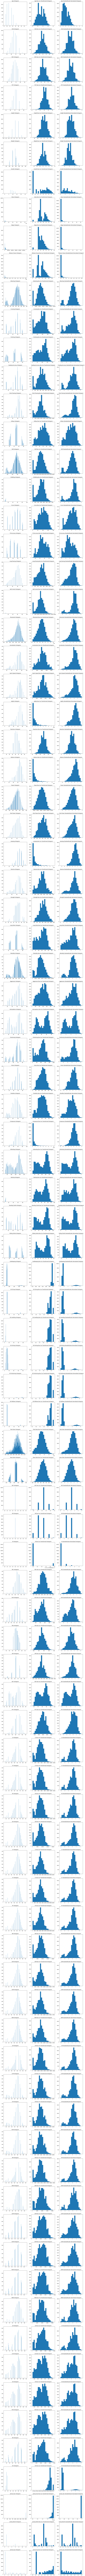

In [18]:
## creating plots for all numeric columns

import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

# Get all numeric columns
num_cols = data_final.select_dtypes(include='number').columns.tolist()

# Create a figure with multiple subplots
fig, axs = plt.subplots(len(num_cols), 3, figsize=(15, len(num_cols) * 5))

# Loop through each numeric column
for i, col in enumerate(num_cols):

    # Plot the histogram
    axs[i, 0].hist(data_final[col], bins=1000)
    axs[i, 0].set_title(f'{col} Histogram')

    # Apply Box-Cox transformation
    transformed, lam = boxcox(data_final[col] + 1)
    axs[i, 1].hist(transformed, bins=20)
    axs[i, 1].set_title(f'{col} Box-Cox Transformed Histogram')

    # Apply StandardScaler normalization
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data_final[[col]])
    axs[i, 2].hist(scaled, bins=20)
    axs[i, 2].set_title(f'{col} StandardScaler Normalized Histogram')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [19]:
numeric = data_final.select_dtypes(include=[np.number])
categoric = data_final.select_dtypes(include=[np.object])

numeric.corr()


,Age,OVA,BOV,POT,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Joined_Year,Joined_Month,Joined_Day
Age,1.000000,0.510190,0.449172,-0.265189,0.084613,0.247886,-0.862499,0.100280,0.191988,0.089408,0.179319,0.146339,0.106364,0.163688,0.170374,0.176550,0.165271,0.042732,0.172031,0.214472,0.215641,0.116971,-0.030094,-0.163236,-0.156360,-0.024098,0.496184,-0.081042,0.326213,0.310067,0.204955,0.101209,0.347191,0.188974,0.265012,0.268966,0.185152,0.119553,0.228019,0.179375,0.387064,0.115572,0.158304,0.102119,0.081687,0.125735,0.121675,0.123776,0.124031,0.132005,0.120667,0.284183,0.419583,0.081656,0.082399,0.354563,-0.149904,0.304178,0.386993,0.244911,0.221206,0.443858,0.172089,0.172089,0.172089,0.112157,0.142574,0.142574,0.142574,0.112157,0.147653,0.147653,0.147653,0.122271,0.205123,0.205123,0.205123,0.122271,0.155375,0.218217,0.218217,0.218217,0.155375,0.150734,0.203433,0.203433,0.203433,0.150734,0.159058,-0.036648,-0.040349,0.055248
OVA,0.510190,1.000000,0.986508,0.585383,0.022775,0.148034,-0.597906,0.527888,0.592314,0.590775,0.432353,0.387199,0.306958,0.302429,0.492796,0.358943,0.443539,0.354846,0.398121,0.366928,0.482034,0.431634,0.320400,0.157459,0.167128,0.236538,0.873803,0.105788,0.556720,0.543457,0.262417,0.353089,0.336094,0.392371,0.494552,0.383374,0.302175,0.339662,0.506601,0.307619,0.679402,0.251764,0.295278,0.237482,0.209789,0.038056,0.037577,0.037249,0.033039,0.043132,0.036981,0.613440,0.838085,0.204124,0.357505,0.462256,0.219786,0.486521,0.700432,0.649643,0.346620,0.549206,0.461989,0.461989,0.461989,0.432065,0.460078,0.460078,0.460078,0.432065,0.473168,0.473168,0.473168,0.454634,0.528249,0.528249,0.528249,0.454634,0.436079,0.463345,0.463345,0.463345,0.436079,0.408967,0.377490,0.377490,0.377490,0.408967,0.097900,-0.015682,0.027490,0.028511
BOV,0.449172,0.986508,1.000000,0.621935,0.013447,0.130667,-0.545893,0.534122,0.593296,0.599770,0.466915,0.400188,0.340429,0.334992,0.534466,0.386142,0.476655,0.392808,0.418845,0.385879,0.515602,0.472590,0.352722,0.191511,0.201810,0.263923,0.874120,0.132100,0.583426,0.559680,0.266943,0.385702,0.334822,0.422043,0.524429,0.401699,0.317052,0.368313,0.529645,0.332703,0.697304,0.271544,0.314907,0.257676,0.228104,-0.010126,-0.010246,-0.010524,-0.014662,-0.003803,-0.010456,0.641435,0.834128,0.215942,0.386513,0.446744,0.228470,0.478168,0.690241,0.645287,0.351327,0.541784,0.498749,0.498749,0.498749,0.468143,0.497220,0.497220,0.497220,0.468143,0.511182,0.511182,0.511182,0.491310,0.565945,0.565945,0.565945,0.491310,0.466814,0.493257,0.493257,0.493257,0.466814,0.438502,0.401597,0.401597,0.401597,0.438502,0.049857,-0.014430,0.033503,0.027826
POT,-0.265189,0.585383,0.621935,1.000000,-0.022920,-0.042518,0.299871,0.458881,0.466190,0.535177,0.236116,0.211804,0.174724,0.135787,0.318337,0.177130,0.268070,0.266906,0.222828,0.165672,0.282837,0.290782,0.269063,0.201080,0.200117,0.191235,0.471250,0.132256,0.224405,0.270227,0.073065,0.172191,0.024940,0.192322,0.243485,0.140923,0.139361,0.189392,0.304286,0.140657,0.360273,0.142059,0.149043,0.139238,0.129746,-0.009309,-0.007900,-0.008426,-0.013408,-0.007758,-0.007576,0.332540,0.471370,0.138572,0.250621,0.284342,0.264424,0.242397,0.394254,0.444554,0.169621,0.157004,0.266870,0.266870,0.266870,0.282802,0.291036,0.291036,0.291036,0.282802,0.303501,0.303501,0.303501,0.295661,0.317695,0.317695,0.317695,0.295661,0.260047,0.254399,0.254399,0.254399,0.260047,0.241470,0.186490,0.186490,0.186490,0

In [20]:
#####rever se é para dropar alguma coisa

correlation=numeric.corr()
cols_to_drop = []
drop_next = False
for i in range(len(correlation.columns)):
    if drop_next:
        drop_next = False
        continue
    for j in range(i+1, len(correlation)):
        if correlation.iloc[i,j] == 1.0:
            pass
        elif correlation.iloc[i,j] > 0.8:
            cols_to_drop.append(correlation.columns[i])
            drop_next = True
            break

if not cols_to_drop:
    print('\033[1m' + "There are no high-correlation columns, thus no column was dropped." + '\033[1m')
else:
    numeric = numeric.drop(columns=cols_to_drop)
    print('\033[1m' + "The following high-correlation columns should were dropped: " + '\033[1m', cols_to_drop)
    print("""""")
    print("New numerical data: ")
    display(numeric)


The following high-correlation columns should were dropped:  ['OVA', 'Attacking', 'Finishing', 'Short Passing', 'Skill', 'Curve', 'Long Passing', 'Movement', 'Power', 'Stamina', 'Long Shots', 'Aggression', 'Positioning', 'Penalties', 'Defending', 'Standing Tackle', 'Goalkeeping', 'GK Handling', 'GK Positioning', 'Total Stats', 'SM', 'PAS', 'DEF', 'LS', 'RS', 'LF', 'RF', 'LAM', 'RAM', 'LCM', 'RCM', 'LWB', 'CDM', 'RWB', 'LCB', 'RCB']

New numerical data: 


,Age,BOV,POT,Height,Weight,Growth,Value,Wage,Release Clause,Crossing,Heading Accuracy,Volleys,Dribbling,FK Accuracy,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Strength,Mentality,Interceptions,Vision,Composure,Marking,Sliding Tackle,GK Diving,GK Kicking,GK Reflexes,Base Stats,W/F,IR,PAC,SHO,DRI,PHY,ST,LW,CF,RW,CAM,LM,CM,RM,LDM,RDM,LB,CB,RB,GK,Joined_Year,Joined_Month,Joined_Day
11,37,77,78,72,165,0,0,0,0,82,41,68,66,89,83,54,62,58,80,64,79,59,70,367,57,87,0,60,44,10,7,7,411,3,3,58,71,71,74,68,74,73,74,77,77,77,77,73,73,63,59,63,15,2013,1,1
20,39,69,69,76,201,0,0,0,0,18,14,17,18,12,13,35,31,54,66,41,18,77,67,90,11,16,0,11,16,71,60,68,373,2,2,71,70,68,71,25,24,23,24,24,24,23,24,24,24,23,25,23,69,2015,7,1
36,36,80,79,74,183,0,0,0,0,63,59,79,82,72,84,77,72,78,81,56,75,70,64,323,23,83,0,26,25,10,7,10,393,4,3,74,75,81,61,76,77,78,77,80,75,69,75,57,57,48,45,48,15,2014,12,1
54,38,77,79,72,174,0,0,0,0,48,81,52,51,36,64,33,46,48,71,63,53,70,75,305,80,52,79,81,72,16,8,12,349,3,3,40,47,56,66,58,54,56,54,57,54,62,54,71,71,65,77,65,19,2016,1,1
72,39,75,86,71,176,11,0,0,0,71,69,72,72,75,81,46,50,60,63,66,61,43,52,327,45,89,0,16,20,13,13,7,344,4,2,48,72,73,45,67,67,67,67,75,70,69,70,51,51,43,37,43,14,2008,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,19,60,72,73,174,12,300000,2000,570000,12,16,8,9,15,14,22,26,30,45,50,45,60,55,122,7,55,40,50,16,60,60,65,329,2,1,60,61,65,59,20,19,21,19,23,21,25,21,26,26,22,27,22,59,2020,7,1
17121,18,58,66,70,170,10,130000,3000,273000,50,50,41,57,50,54,61,63,52,54,68,51,62,57,259,50,53,46,34,56,12,7,11,319,3,1,62,46,56,55,53,55,54,55,56,56,55,56,52,52,52,49,52,17,2020,8,20
17122,18,56,67,69,154,11,130000,2000,273000,55,53,34,52,34,47,66,61,54,59,68,28,61,54,256,55,45,43,55,54,8,5,8,303,3,1,63,35,52,55,46,50,47,50,47,50,46,50,50,50,54,54,54,14,2020,8,20
17123,20,62,73,69,148,11,475000,3000,784000,62,52,23,55,46,57,72,70,74,56,77,51,72,48,257,58,56,54,57,61,15,8,9,335,4,1,71,34,59,54,48,55,52,55,54,56,55,56,58,58,60,58,60,16,2020,9,30


In [21]:
numeric.describe()

,Age,BOV,POT,Height,Weight,Growth,Value,Wage,Release Clause,Crossing,Heading Accuracy,Volleys,Dribbling,FK Accuracy,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Strength,Mentality,Interceptions,Vision,Composure,Marking,Sliding Tackle,GK Diving,GK Kicking,GK Reflexes,Base Stats,W/F,IR,PAC,SHO,DRI,PHY,ST,LW,CF,RW,CAM,LM,CM,RM,LDM,RDM,LB,CB,RB,GK,Joined_Year,Joined_Month,Joined_Day
count,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,1.633700e+04,16337.000000,1.633700e+04,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.00000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.00000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000,16337.000000
mean,25.065251,67.833446,72.516864,71.348412,165.519618,5.661443,1.538982e+07,10307.134113,4.086103e+07,51.419171,53.389484,44.680357,57.748485,44.017384,60.484912,65.626492,65.631266,64.647793,62.772357,64.702455,59.534798,65.132215,65.219441,261.027055,46.930648,55.24319,59.647855,47.271776,46.062496,15.627471,15.356430,15.730734,361.035625,2.981882,1.126890,68.288547,54.752158,64.140111,64.879292,56.339781,57.384097,57.264430,57.384097,57.556895,58.027484,56.64057,58.027484,54.698476,54.698476,54.373753,53.210198,54.373753,20.761462,2017.183387,5.782212,10.521822
std,4.804149,6.620252,5.747693,2.712705,15.747996,5.813596,3.932140e+07,21139.223983,9.977987e+07,17.836096,16.893946,17.653096,18.063608,17.347607,15.867933,14.585018,14.363369,14.410667,9.015217,14.071153,13.245956,11.956608,12.602494,62.704531,20.799119,13.72170,12.099295,20.084864,21.156371,16.838009,15.825361,17.148764,40.278464,0.670886,0.420312,10.966810,13.881383,9.818075,9.650814,13.032983,14.063986,13.688579,14.063986,13.546627,13.517824,12.74699,13.517824,13.503193,13.503193,13.547536,14.568899,13.547536,14.576942,41.820720,2.961485,10.165364
min,16.000000,44.000000,47.000000,61.000000,110.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,6.000000,5.000000,0.000000,5.000000,5.000000,5.000000,12.000000,11.000000,0.000000,24.000000,0.000000,12.000000,0.000000,16.000000,50.000000,4.000000,0.00000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000,228.000000,1.000000,1.000000,25.000000,16.000000,28.000000,27.000000,15.000000,14.000000,15.000000,14.000000,15.000000,15.000000,15.00000,15.000000,16.000000,16.000000,14.000000,16.000000,14.000000,8.000000,0.000000,0.000000,0.000000
25%,21.000000,64.000000,69.000000,69.000000,154.000000,0.000000,3.750000e+05,1000.000000,5.600000e+05,40.000000,45.000000,32.000000,53.000000,32.000000,57.000000,59.000000,59.000000,57.000000,57.000000,57.000000,50.000000,58.000000,58.000000,234.000000,26.000000,46.00000,53.000000,30.000000,25.000000,8.000000,8.000000,8.000000,333.000000,3.000000,1.000000,62.000000,45.000000,59.000000,59.000000,51.000000,52.000000,51.000000,52.000000,52.000000,53.000000,51.00000,53.000000,47.000000,47.000000,47.000000,43.000000,47.000000,15.000000,2017.000000,2.000000,1.000000
50%,24.000000,68.000000,72.000000,71.000000,165.000000,4.000000,8.000000e+05,3000.000000,1.200000e+07,56.000000,56.000000,46.000000,63.000000,42.000000,64.000000,68.000000,68.000000,67.000000,63.000000,67.000000,61.000000,66.000000,66.000000,269.000000,53.000000,57.00000,61.000000,52.000000,52.000000,11.000000,11.000000,11.000000,362.000000,3.000000,1.000000,69.000000,57.000000,65.000000,66.000000,59.000000,61.000000,60.000000,61.000000,60.000000,61.000000,59.00000,61.000000,57.000000,57.000000,57.000000,56.000000,57.000000,16.000000,2019.000000,7.000000,7.000000
75%,28.000000,72.000000,76.00000

In [22]:
numeric["Value"]

11            0
20            0
36            0
54            0
72            0
          ...  
17119    300000
17121    130000
17122    130000
17123    475000
17124    325000
Name: Value, Length: 16337, dtype: int64

In [23]:
####test à parte 

data_filt=data_final[(data_final["Value"]<np.percentile(data_final["Value"], 50))&
                    (data_final["Wage"]<np.percentile(data_final["Wage"], 50))&
                    (data_final["Release Clause"]<np.percentile(data_final["Release Clause"], 25))&
                    (data_final["Age"]<23)&(data_final["POT"]>80)]
data_filt

############

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,contract_endyear,Joined_Year,Joined_Month,Joined_Day
8950,Welington Dano,20,81,Brazil,Brazil,81,LB,LB LM,81,Brazil Free,70,152,Left,0,NaN,0,0,0,Free,327,82,51,69,78,47,361,77,83,52,71,78,402,78,80,83,80,81,336,55,71,89,68,53,354,69,77,72,75,61,82,228,70,77,81,60,16,15,15,7,7,2068,436,4,4,Medium,Medium,1,79,54,76,78,75,74,170,67,67,67,74,72,72,72,74,74,74,74,76,75,75,75,76,79,76,76,76,79,79,74,74,74,79,19,Free,2019,1,1
10413,S. Szymański,21,69,Poland,Poland,70,CAM,RM CAM,83,Poland Free,69,132,Left,14,NaN,0,0,0,Free,278,67,58,40,66,47,343,72,69,69,61,72,393,86,82,91,56,78,299,67,59,70,36,67,242,39,23,59,67,54,66,94,36,26,32,57,9,10,10,14,14,1706,360,3,3,Medium,Low,1,84,61,66,73,30,46,171,61,61,61,69,67,67,67,69,68,68,68,68,61,61,61,68,54,48,48,48,54,50,38,38,38,50,17,Free,2019,6,11
11140,J. Savarino,22,73,Venezuela,Venezuela,74,CAM,RW RM,82,Venezuela Free,67,146,Right,9,NaN,0,0,0,Free,309,64,69,43,70,63,327,77,65,53,58,74,406,85,80,90,70,81,336,78,55,78,58,67,284,59,30,66,69,60,71,108,36,42,30,53,7,13,6,15,12,1823,395,4,4,High,Medium,1,82,70,66,77,37,63,4,69,69,69,73,72,72,72,73,72,72,72,72,66,66,66,72,58,55,55,55,58,55,47,47,47,55,18,Free,2020,2,7
12632,D. Levitt,19,63,Wales,Charlton Athletic,65,CAM,CM CDM CAM,81,"Charlton Athletic Jun 30, 2021 On Loan",71,163,Right,18,"Jun 30, 2021",775000,1000,0,"Jun 30, 2021 On Loan",271,56,55,42,66,52,301,59,62,50,64,66,339,68,61,77,64,69,292,60,50,65,57,60,303,59,56,59,66,63,69,150,47,55,48,43,7,10,7,6,13,1699,358,4,3,Medium,Medium,1,64,57,63,64,51,59,137,58,58,58,62,62,62,62,62,63,63,63,62,63,63,63,62,59,60,60,60,59,57,54,54,54,57,15,Loan,2018,4,25
14181,A. Gómez,18,63,Mexico,Boavista FC,63,LB,LB CB,81,"Boavista FC Jun 30, 2021 On Loan",72,159,Left,18,"Jun 30, 2021",700000,550,0,"Jun 30, 2021 On Loan",233,53,32,63,58,27,225,62,39,35,29,60,305,66,67,57,56,59,256,34,57,70,59,36,237,50,55,46,39,47,44,187,57,66,64,42,7,12,6,12,5,1485,329,3,2,Medium,High,1,67,34,47,60,61,60,89,50,50,50,54,52,52,52,54,51,51,51,55,51,51,51,55,60,56,56,56,60,61,60,60,60,61,14,Loan,2019,7,1
14261,Pedro Brazão,17,62,Portugal,FC Lausanne-Sport,64,CAM,RW CAM,81,"FC Lausanne-Sport Jun 30, 2021 On Loan",68,137,Left,19,"Jun 30, 2021",600000,750,0,"Jun 30, 2021 On Loan",241,46,51,41,56,47,315,72,64,53,54,72,380,74,76,86,57,87,264,64,57,52,38,53,232,41,26,49,58,58,61,119,45,35,39,43,9,10,6,11,7,1594,336,3,3,Medium,Medium,1,75,54,54,73,37,43,43,57,57,57,62,61,61,61,62,62,62,62,61,56,56,56,61,50,47,47,47,50,49,42,42,42,49,14,Loan,2019,4,20
15510,S. Robertson,18,62,Scotland,Gillingham,63,LM,CDM CM CAM,81,"Gillingham Jun 30, 2021 On Loan",68,141,Left,19,"Jun 30, 2021",600000,550,0,"Jun 30, 2021 On Loan",232,52,47,38,65,30,316,64,60,64,62,66,348,73,72,73,54,76,264,47,57,66,50,44,272,72,55,45,59,41,58,179,58,62,59,56,11,15,14,7,9,1667,359,3,2,High,Medium,1,72,45,60,66,57,59,50,52,52,52,59,57,57,57,59,60,60,60,61,60,60,60,61,61,61,61,61,61,60,57,57,57,60,15,Loan,2018,7,1
15803,I. Vassilev,19,62,United States,Burton Albion,62,LW,LW RW ST,82,"Burton Albion Jun 30, 2021 On Loan",69,143,Left,20,"Jun 30, 2021",650000,1000,0,"Jun 30, 2021 On Loan",275,60,64,45,52,54,277,66,56,50,41,64,351,74,73,72,54,78,270,66,40,54,55,55,228,39,20,52,53,64,56,98,30,36,32,56,11,8,9,14,14,1555,336,3,2,High,Low,1,73,62,52,66,

In [24]:
numeric

,Age,BOV,POT,Height,Weight,Growth,Value,Wage,Release Clause,Crossing,Heading Accuracy,Volleys,Dribbling,FK Accuracy,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Strength,Mentality,Interceptions,Vision,Composure,Marking,Sliding Tackle,GK Diving,GK Kicking,GK Reflexes,Base Stats,W/F,IR,PAC,SHO,DRI,PHY,ST,LW,CF,RW,CAM,LM,CM,RM,LDM,RDM,LB,CB,RB,GK,Joined_Year,Joined_Month,Joined_Day
11,37,77,78,72,165,0,0,0,0,82,41,68,66,89,83,54,62,58,80,64,79,59,70,367,57,87,0,60,44,10,7,7,411,3,3,58,71,71,74,68,74,73,74,77,77,77,77,73,73,63,59,63,15,2013,1,1
20,39,69,69,76,201,0,0,0,0,18,14,17,18,12,13,35,31,54,66,41,18,77,67,90,11,16,0,11,16,71,60,68,373,2,2,71,70,68,71,25,24,23,24,24,24,23,24,24,24,23,25,23,69,2015,7,1
36,36,80,79,74,183,0,0,0,0,63,59,79,82,72,84,77,72,78,81,56,75,70,64,323,23,83,0,26,25,10,7,10,393,4,3,74,75,81,61,76,77,78,77,80,75,69,75,57,57,48,45,48,15,2014,12,1
54,38,77,79,72,174,0,0,0,0,48,81,52,51,36,64,33,46,48,71,63,53,70,75,305,80,52,79,81,72,16,8,12,349,3,3,40,47,56,66,58,54,56,54,57,54,62,54,71,71,65,77,65,19,2016,1,1
72,39,75,86,71,176,11,0,0,0,71,69,72,72,75,81,46,50,60,63,66,61,43,52,327,45,89,0,16,20,13,13,7,344,4,2,48,72,73,45,67,67,67,67,75,70,69,70,51,51,43,37,43,14,2008,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,19,60,72,73,174,12,300000,2000,570000,12,16,8,9,15,14,22,26,30,45,50,45,60,55,122,7,55,40,50,16,60,60,65,329,2,1,60,61,65,59,20,19,21,19,23,21,25,21,26,26,22,27,22,59,2020,7,1
17121,18,58,66,70,170,10,130000,3000,273000,50,50,41,57,50,54,61,63,52,54,68,51,62,57,259,50,53,46,34,56,12,7,11,319,3,1,62,46,56,55,53,55,54,55,56,56,55,56,52,52,52,49,52,17,2020,8,20
17122,18,56,67,69,154,11,130000,2000,273000,55,53,34,52,34,47,66,61,54,59,68,28,61,54,256,55,45,43,55,54,8,5,8,303,3,1,63,35,52,55,46,50,47,50,47,50,46,50,50,50,54,54,54,14,2020,8,20
17123,20,62,73,69,148,11,475000,3000,784000,62,52,23,55,46,57,72,70,74,56,77,51,72,48,257,58,56,54,57,61,15,8,9,335,4,1,71,34,59,54,48,55,52,55,54,56,55,56,58,58,60,58,60,16,2020,9,30


In [25]:
categoric

,Name,Nationality,Club,BP,Position,Team & Contract,foot,Loan Date End,Contract,A/W,D/W,Hits,contract_endyear
11,D. Beckham,England,NaN,CM,CM RM,England Free,Right,NaN,England Free,Medium,Medium,16,Free
20,G. Király,Hungary,Hungary,GK,NaN,Hungary Free,Right,NaN,Free,Medium,Medium,3,Free
36,T. Henry,France,NaN,CAM,CF ST CAM LW,France Free,Right,NaN,France Free,Medium,Medium,22,Free
54,Ricardo Carvalho,Portugal,Portugal,CB,CB,Portugal Free,Right,NaN,Free,Medium,Medium,4,Free
72,J. Litmanen,Finland,Finland,CAM,NaN,Finland Free,Right,NaN,Free,NaN,NaN,3,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,F. Tapia,Mexico,Club América,GK,GK,Club América 2020 ~ 2022,Right,NaN,2020 ~ 2022,Medium,Medium,9,2022
17121,W. Rickard,Wales,Burnley,CAM,CAM CM,Burnley 2020 ~ 2021,Right,NaN,2020 ~ 2021,Medium,Medium,5,2021
17122,C. Barrett,England,Burnley,RB,RB,Burnley 2020 ~ 2022,Right,NaN,2020 ~ 2022,Medium,Medium,3,2022
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,RB,RB LB,SK Sturm Graz 2020 ~ 2023,Right,NaN,2020 ~ 2023,High,Medium,5,2023


In [26]:
Y=numeric["POT"]
numeric=numeric.drop(["POT"],axis=1)

In [27]:
Y.value_counts()

72    1241
73    1215
75    1111
70    1096
71    1095
74    1088
69     911
76     812
68     799
67     743
77     726
78     667
66     596
65     568
79     536
64     492
80     463
81     345
82     270
63     255
83     244
62     179
84     158
85     127
61     116
86      90
60      76
87      65
88      48
59      44
58      34
89      27
57      19
56      15
90      14
55      12
91      10
93       7
92       5
52       4
54       4
48       3
50       3
95       1
53       1
49       1
47       1
Name: POT, dtype: int64

In [28]:
name=categoric["Name"]

In [29]:
categoric=categoric.drop(["Name"],axis=1)

In [30]:
for col in categoric.columns:
    print(col,"| number of unique values: ",categoric[col].nunique())

Nationality | number of unique values:  165
Club | number of unique values:  866
BP | number of unique values:  15
Position | number of unique values:  603
Team & Contract | number of unique values:  9060
foot | number of unique values:  2
Loan Date End | number of unique values:  38
Contract | number of unique values:  315
A/W | number of unique values:  3
D/W | number of unique values:  3
Hits | number of unique values:  593
contract_endyear | number of unique values:  11


In [31]:
categoric=categoric.drop(["Team & Contract","Hits","Club","Contract","Position"],axis=1)

In [32]:
for col in categoric.columns:
    print(col,"| number of unique values: ",categoric[col].nunique())

Nationality | number of unique values:  165
BP | number of unique values:  15
foot | number of unique values:  2
Loan Date End | number of unique values:  38
A/W | number of unique values:  3
D/W | number of unique values:  3
contract_endyear | number of unique values:  11


In [33]:
categoric

,Nationality,BP,foot,Loan Date End,A/W,D/W,contract_endyear
11,England,CM,Right,NaN,Medium,Medium,Free
20,Hungary,GK,Right,NaN,Medium,Medium,Free
36,France,CAM,Right,NaN,Medium,Medium,Free
54,Portugal,CB,Right,NaN,Medium,Medium,Free
72,Finland,CAM,Right,NaN,NaN,NaN,Free
...,...,...,...,...,...,...,...
17119,Mexico,GK,Right,NaN,Medium,Medium,2022
17121,Wales,CAM,Right,NaN,Medium,Medium,2021
17122,England,RB,Right,NaN,Medium,Medium,2022
17123,Bosnia Herzegovina,RB,Right,NaN,High,Medium,2023


In [34]:
categoric.dtypes

Nationality         object
BP                  object
foot                object
Loan Date End       object
A/W                 object
D/W                 object
contract_endyear    object
dtype: object

In [35]:
#loop para gravar nomes do one hot
one_hot_names = []
for col in categoric.columns:
    col_uniques = sorted(categoric[col].astype(str).unique())
    for unique in col_uniques:
        one_hot_names.append(col+"_"+unique)


categoric_x = pd.DataFrame(OneHotEncoder().fit_transform(categoric.astype(str)).toarray())
categoric_x.columns = one_hot_names
categoric_x

,Nationality_Afghanistan,Nationality_Albania,Nationality_Algeria,Nationality_Andorra,Nationality_Angola,Nationality_Antigua &amp; Barbuda,Nationality_Argentina,Nationality_Armenia,Nationality_Aruba,Nationality_Australia,Nationality_Austria,Nationality_Azerbaijan,Nationality_Barbados,Nationality_Belarus,Nationality_Belgium,Nationality_Belize,Nationality_Benin,Nationality_Bermuda,Nationality_Bolivia,Nationality_Bosnia Herzegovina,Nationality_Brazil,Nationality_Brunei Darussalam,Nationality_Bulgaria,Nationality_Burkina Faso,Nationality_Burundi,Nationality_Cameroon,Nationality_Canada,Nationality_Cape Verde,Nationality_Central African Republic,Nationality_Chad,Nationality_Chile,Nationality_China PR,Nationality_Chinese Taipei,Nationality_Colombia,Nationality_Comoros,Nationality_Congo,Nationality_Costa Rica,Nationality_Croatia,Nationality_Cuba,Nationality_Curacao,Nationality_Cyprus,Nationality_Czech Republic,Nationality_DR Congo,Nationality_Denmark,Nationality_Dominican Republic,Nationality_Ecuador,Nationality_Egypt,Nationality_El Salvador,Nationality_England,Nationality_Equatorial Guinea,Nationality_Eritrea,Nationality_Estonia,Nationality_Faroe Islands,Nationality_Finland,Nationality_France,Nationality_Gabon,Nationality_Gambia,Nationality_Georgia,Nationality_Germany,Nationality_Ghana,Nationality_Gibraltar,Nationality_Greece,Nationality_Grenada,Nationality_Guam,Nationality_Guinea,Nationality_Guinea Bissau,Nationality_Guyana,Nationality_Haiti,Nationality_Honduras,Nationality_Hong Kong,Nationality_Hungary,Nationality_Iceland,Nationality_India,Nationality_Indonesia,Nationality_Iran,Nationality_Iraq,Nationality_Israel,Nationality_Italy,Nationality_Ivory Coast,Nationality_Jamaica,Nationality_Japan,Nationality_Jordan,Nationality_Kazakhstan,Nationality_Kenya,Nationality_Korea DPR,Nationality_Korea Republic,Nationality_Kosovo,Nationality_Latvia,Nationality_Lebanon,Nationality_Liberia,Nationality_Libya,Nationality_Liechtenstein,Nationality_Lithuania,Nationality_Luxembourg,Nationality_Macau,Nationality_Madagascar,Nationality_Malawi,Nationality_Malaysia,Nationality_Mali,Nationality_Malta,Nationality_Mauritania,Nationality_Mexico,Nationality_Moldova,Nationality_Montenegro,Nationality_Montserrat,Nationality_Morocco,Nationality_Mozambique,Nationality_Namibia,Nationality_Netherlands,Nationality_New Caledonia,Nationality_New Zealand,Nationality_Nicaragua,Nationality_Niger,Nationality_Nigeria,Nationality_North Macedonia,Nationality_Northern Ireland,Nationality_Norway,Nationality_Palestine,Nationality_Panama,Nationality_Papua New Guinea,Nationality_Paraguay,Nationality_Peru,Nationality_Philippines,Nationality_Poland,Nationality_Portugal,Nationality_Puerto Rico,Nationality_Qatar,Nationality_Republic of Ireland,Nationality_Romania,Nationality_Russia,Nationality_Rwanda,Nationality_Saint Kitts and Nevis,Nationality_Saint Lucia,Nationality_Saudi Arabia,Nationality_Scotland,Nationality_Senegal,Nationality_Serbia,Nationality_Sierra Leone,Nationality_Slovakia,Nationality_Slovenia,Nationality_South Africa,Nationality_South Sudan,Nationality_Spain,Nationality_Sudan,Nationality_Sweden,Nationality_Switzerland,Nationality_Syria,Nationality_São Tomé &amp; Príncipe,Nationality_Tanzania,Nationality_Thailand,Nationality_Togo,Nationality_Trinidad &amp; Tobago,Nationality_Tunisia,Nationality_Turkey,Nationality_Uganda,Nationality_Ukraine,Nationality_United Arab Emirates,Nationality_United States,Nationality_Uruguay,Nationality_Uzbekistan,Nationality_Venezuela,Nationality_Vietnam,Nationality_Wales,Nationality_Zambia,Nationality_Zimbabwe,BP_CAM,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,foot_Left,foot_Right,"Loan Date End_Apr 30, 2015","Loan Date End_Aug 31, 2020","Loan Date End_Aug 31, 2021","Loan Date End_Dec 30, 2020","Loan Date End_Dec 30, 2021","Loan Date End_Dec 31, 2019","Loan Date End_Dec 31, 2020","Loan Date End_Dec 31, 2021","Loan Date End_Jan 1, 2021","Loan Date End_Jan 17, 2021","Loan Date End_Jan 2, 2016","Loan Date 